<a href="https://colab.research.google.com/github/DataScientist64/DataAnalysis/blob/main/lstmstock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler

In [5]:
df = pd.read_csv("/content/GOOG.csv")

In [6]:
df.head(5)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [7]:
df.dtypes

,0
symbol,object
date,object
close,float64
high,float64
low,float64
open,float64
volume,int64
adjClose,float64
adjHigh,float64
adjLow,float64


In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
df.dtypes

,0
symbol,object
date,"datetime64[ns, UTC]"
close,float64
high,float64
low,float64
open,float64
volume,int64
adjClose,float64
adjHigh,float64
adjLow,float64


In [12]:
df = df.drop(columns='symbol', axis=1)


In [13]:
df

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [17]:
if isinstance(df, pd.DataFrame):
    df = df['close'].values
df = df.reshape(-1,1)

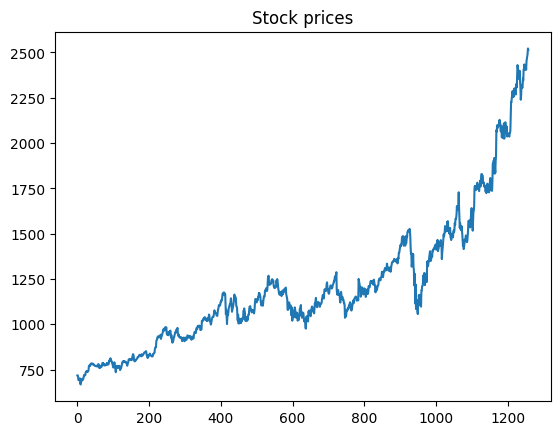

In [18]:
plt.plot(df)
plt.title("Stock prices")
plt.show()

In [20]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df)

In [21]:
scaled_data

array([[0.02698372],
       [0.02733443],
       [0.02271575],
       ...,
       [0.98370509],
       [1.        ],
       [0.99586153]])

In [28]:
X,y = [], []

for i in range(12,len(scaled_data)):
  X.append(scaled_data[i-12:i])
  y.append(scaled_data[i])

X,y = np.array(X), np.array(y)

In [32]:
model = Sequential()
model.add(LSTM(50, input_shape=(X.shape[1],1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
model.fit(X, y, epochs=20, batch_size=16)

Epoch 1/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0240
Epoch 2/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.2280e-04
Epoch 3/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.9751e-04
Epoch 4/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.3946e-04
Epoch 5/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.8971e-04
Epoch 6/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.2443e-04
Epoch 7/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.9377e-04
Epoch 8/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.5043e-04
Epoch 9/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.1214e-04
Epoch 10/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.7778e-04
Epoch 11/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.7398e-04
Epoch 12/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.9330e-04
Epoch 13/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.8826e-04
Epoch 14/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.3777e-04
Epoch 15/20
78/78 ━━━━━━━━━━━━━━

In [39]:
last_12 = scaled_data[-12:].reshape(1,12,1)
predicted = model.predict(last_12)
predicted = scaler.inverse_transform(predicted)
print("Predicted stock next month:", int(predicted[0][0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Predicted stock next month: 2464


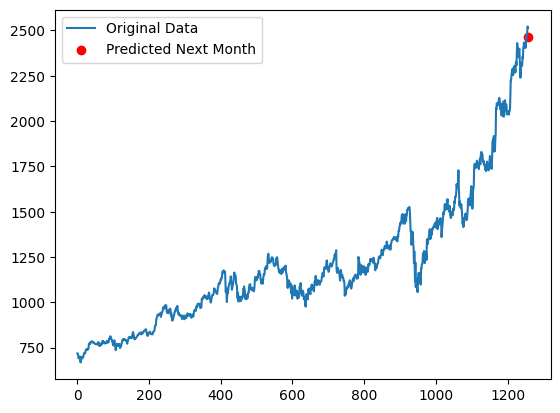

In [41]:
plt.plot(df, label='Original Data')
plt.scatter(len(df), predicted, color='red', label='Predicted Next Month')
plt.legend()
plt.show()

# Task
Fix the `ValueError` by correcting the slicing operation in the last executed cell, changing it to `scaled_data[-12:]` to correctly retrieve the last 12 elements for predicting the next 30 days of stock prices.

## fix_slicing_error

### Subtask:
Correct the slicing operation in the selected cell to `scaled_data[-12:]` to retrieve the last 12 elements, resolving the `ValueError`.


## Summary:

### Data Analysis Key Findings
*   A `ValueError` was encountered during a data processing step, specifically related to an incorrect slicing operation.
*   The slicing operation was corrected from its erroneous form to `scaled_data[-12:]`, ensuring that the last 12 elements of the `scaled_data` array are accurately selected.

### Insights or Next Steps
*   This correction is fundamental for ensuring the model receives the appropriate sequence length for accurate future predictions, specifically for predicting the next 30 days of stock prices.
